# Circle of fifths  and Sierpiński triangle shape algorithm:

https://youtube.com/shorts/A7xMJ639gAw?si=vr9JzHWUt7zdFeHt

0. Draw the circle of fifths as an HSV colored wheel with M=12 slots using M colors and add M labels for the notes. radius=1
  ['A','D','G','C','F','Bb','Eb','Ab','Db','Gb','B','E'] is mapped to an index k=[0,1,2,3,4,5,6,7,8,9,10,11]
  The position in the complex plane for the circle of fifths and its 12 notes is given by 
  $$S_k=e^{i\frac{2\pi}{M}k}$$
  
  


  

1. Randomly choose a point inside a unitary circle - Express it as a complex number 
    
    $$Z_o=r_o e^{\phi_o}$$ 
    
    There are many ways to select a random point inside a unitary circle, 
    we try selecting a radius and and an angle, as if we where doing it with
    a compass.   
    
    $$r_{min}<r_o<r_{max}$$ 
    
    and 
    
    $$-\pi<\phi_o<\pi$$

    With a resolution=1000 points per interval  

    

2. Randomly choose between this three notes $(A_b,E,C) or (7,11,3) $ note in the circle of fifths 
   and express it as a complex number $Z_{note}=S_k$ using the mapping given by the index
    
    $$S_k=e^{i\frac{2\pi}{M}k}$$ 
    
    always expressing the notes in this order:
    
    ['A','D','G','C','F','Bb','Eb','Ab','Db','Gb','B','E']

    
    $$0<k<M-1$$
    $$k=[0,1,2,3,4,5,6,7,8,9,10,11]$$

    * A_b is k=7

    * E is k=11

    * C is k=3


3. Draw a line between $Z_o$ and $Z_{note}$

4. Find the mid point between $Z_o$ and $Z_{note}$ and call it $Z_{\frac{1}{2}}$

5. Set $Z_o=Z_{\frac{1}{2}}$ and repeat $N_{iter}$ times from step 2 using this new value of $Z_o$ in step 3






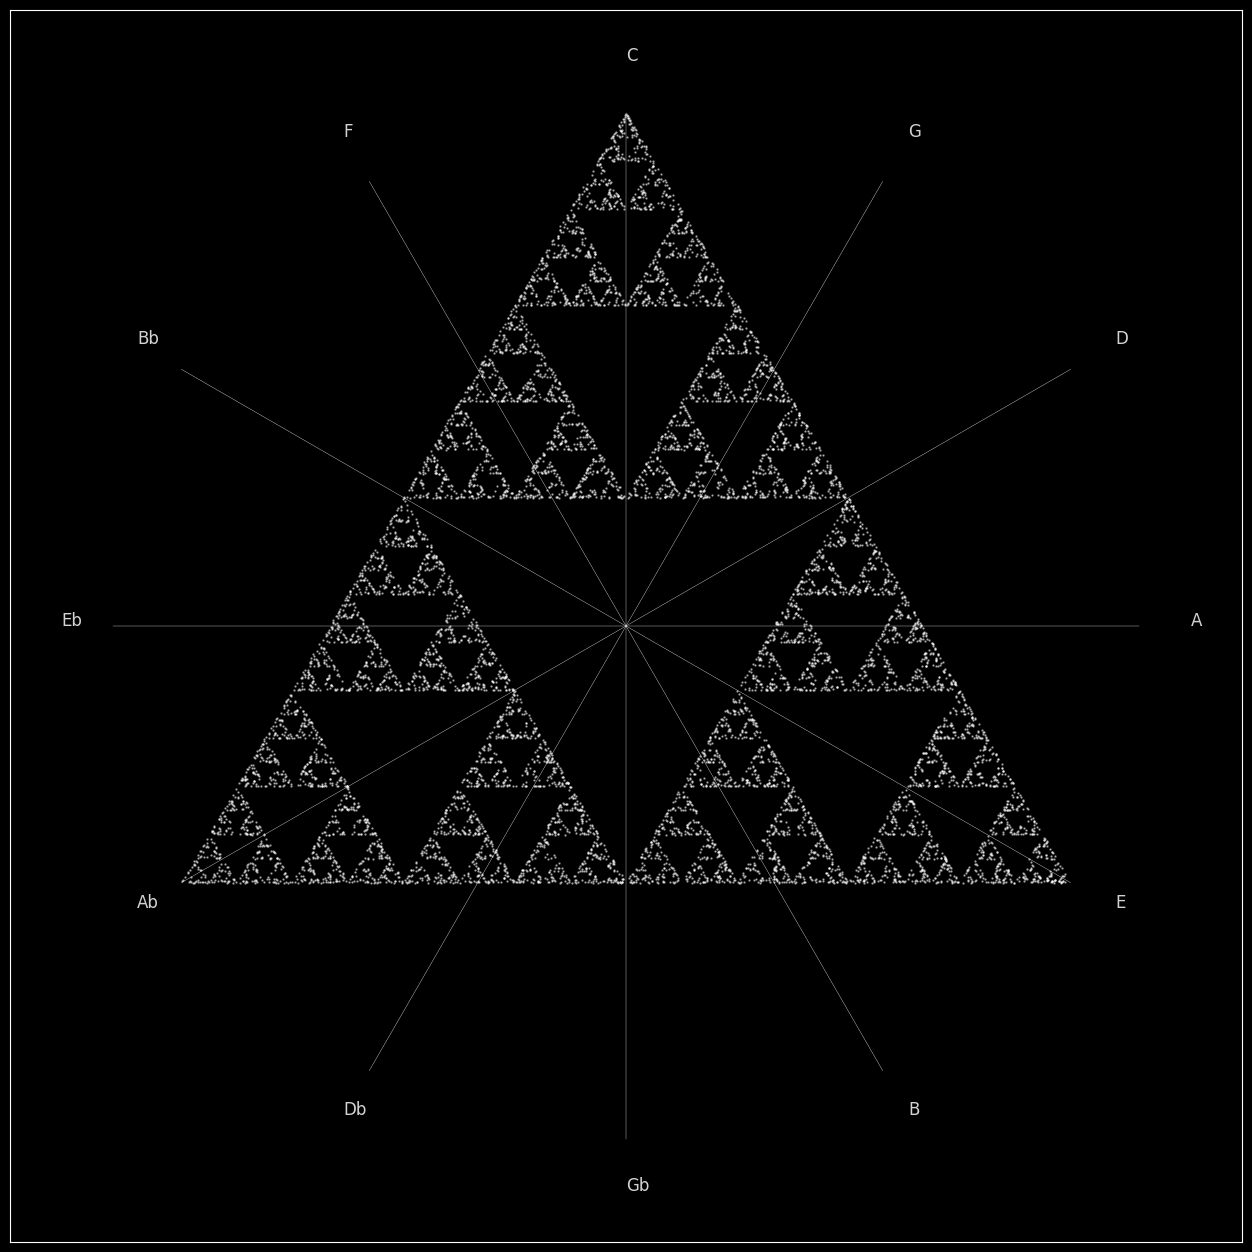

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

# Set the dark style and customize colors
style.use('dark_background')
plt.rcParams['text.color'] = 'lightgray'
plt.rcParams['axes.labelcolor'] = 'lightgray'
plt.rcParams['xtick.color'] = 'lightgray'
plt.rcParams['ytick.color'] = 'lightgray'

# Circle of fifths
M = 12
fifths = np.array(['A','D','G','C','F','Bb','Eb','Ab','Db','Gb','B','E'])
omega_s = 2 * np.pi / M

# Function to get the complex number for a note in the circle of fifths
def get_note_complex(note):
    k = np.where(fifths == note)[0][0]
    return np.exp(1j * omega_s * k)

# Parameters
r_min = 0
r_max = 1
phi_min = -np.pi
phi_max = np.pi
resolution = 1000
N_iter = 10000
triangle=['Ab', 'E', 'C']
# Randomly choose initial point inside the unitary circle
r_o = np.random.uniform(r_min, r_max)
phi_o = np.random.uniform(phi_min, phi_max)
Z_o = r_o * np.exp(1j * phi_o)

# Initialize the plot with a larger figure size
fig, ax = plt.subplots(figsize=(16, 16))

# Draw the circle of fifths
for k in range(M):
    note = fifths[k]
    S_k = np.exp(1j * omega_s * k)
    ax.plot([0, S_k.real], [0, S_k.imag], 'w-', lw=0.25)
    ax.text(1.1 * S_k.real, 1.1 * S_k.imag, note, fontsize=12, color='lightgray')

# Iterate and draw lines
for _ in range(N_iter):
    # Randomly choose a note from (Ab, E, C)
    note = np.random.choice(triangle)
    Z_note = get_note_complex(note)
    
    # Draw a line between Z_o and Z_note
    #ax.plot([Z_o.real, Z_note.real], [Z_o.imag, Z_note.imag], 'r-', lw=0.05)
    ax.scatter(Z_o.real,Z_o.imag,s=0.5,alpha=0.5,color='w')
    
    # Find the midpoint between Z_o and Z_note
    Z_half = (Z_o + Z_note) / 2
    
    # Update Z_o with the midpoint
    Z_o = Z_half

# Set aspect ratio and limits
ax.set_aspect('equal')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

# Remove the axis labels and ticks
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.savefig('output_scatter_white.png')
plt.show()

In [39]:
# Parameters
r_min = 0
r_max = 1
phi_min = -np.pi
phi_max = np.pi
resolution = 1000
N_iter = 10000
triangle=np.array(['Ab', 'E', 'C'])
 # Circle of fifths
M = 12
fifths = np.array(['A','D','G','C','F','Bb','Eb','Ab','Db','Gb','B','E'])
omega_s = 2 * np.pi / M

In [40]:
def plot_fifths(M=M,label_map=fifths,
                omega_s=omega_s,
                r_min=0,
                r_max=1,
                phi_min=-np.pi,
                phi_max=np.pi,
                resolution=1000,
                N_iter=100,
                input_map=triangle,
                output_path='salida.png',
                line_flag=True):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.style as style
    # Function to get the complex number for a note in the circle of fifths
    def get_note_complex(note):
        k = np.where(label_map == note)[0][0]
        return np.exp(1j * omega_s * k)

    # Set the dark style and customize colors
    style.use('dark_background')
    plt.rcParams['text.color'] = 'lightgray'
    plt.rcParams['axes.labelcolor'] = 'lightgray'
    plt.rcParams['xtick.color'] = 'lightgray'
    plt.rcParams['ytick.color'] = 'lightgray'

   




    # Randomly choose initial point inside the unitary circle
    r_o = np.random.uniform(r_min, r_max)
    phi_o = np.random.uniform(phi_min, phi_max)
    Z_o = r_o * np.exp(1j * phi_o)

    # Initialize the plot with a larger figure size
    fig, ax = plt.subplots(figsize=(16, 16))

    # Draw the circle of fifths
    for k in range(M):
        note = label_map[k]
        S_k = np.exp(1j * omega_s * k)
        ax.plot([0, S_k.real], [0, S_k.imag], 'w-', lw=0.25)
        ax.text(1.1 * S_k.real, 1.1 * S_k.imag, note, fontsize=12, color='lightgray')

    # Iterate and draw lines
    for _ in range(N_iter):
        # Randomly choose a note from (Ab, E, C)
        note = np.random.choice(input_map)
        Z_note = get_note_complex(note)
        
        # Draw a line between Z_o and Z_note
        if line_flag:
            ax.plot([Z_o.real, Z_note.real], [Z_o.imag, Z_note.imag], 'r-', lw=0.05)
        if 
        ax.scatter(Z_o.real,Z_o.imag,s=0.5,alpha=0.5,color='w')
        
        # Find the midpoint between Z_o and Z_note
        Z_half = (Z_o + Z_note) / 2
        
        # Update Z_o with the midpoint
        Z_o = Z_half

    # Set aspect ratio and limits
    ax.set_aspect('equal')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)

    # Remove the axis labels and ticks
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([])
    ax.set_yticks([])

    # Show the plot
    plt.savefig(output_path)
    plt.show()

SyntaxError: invalid syntax (3292031853.py, line 56)

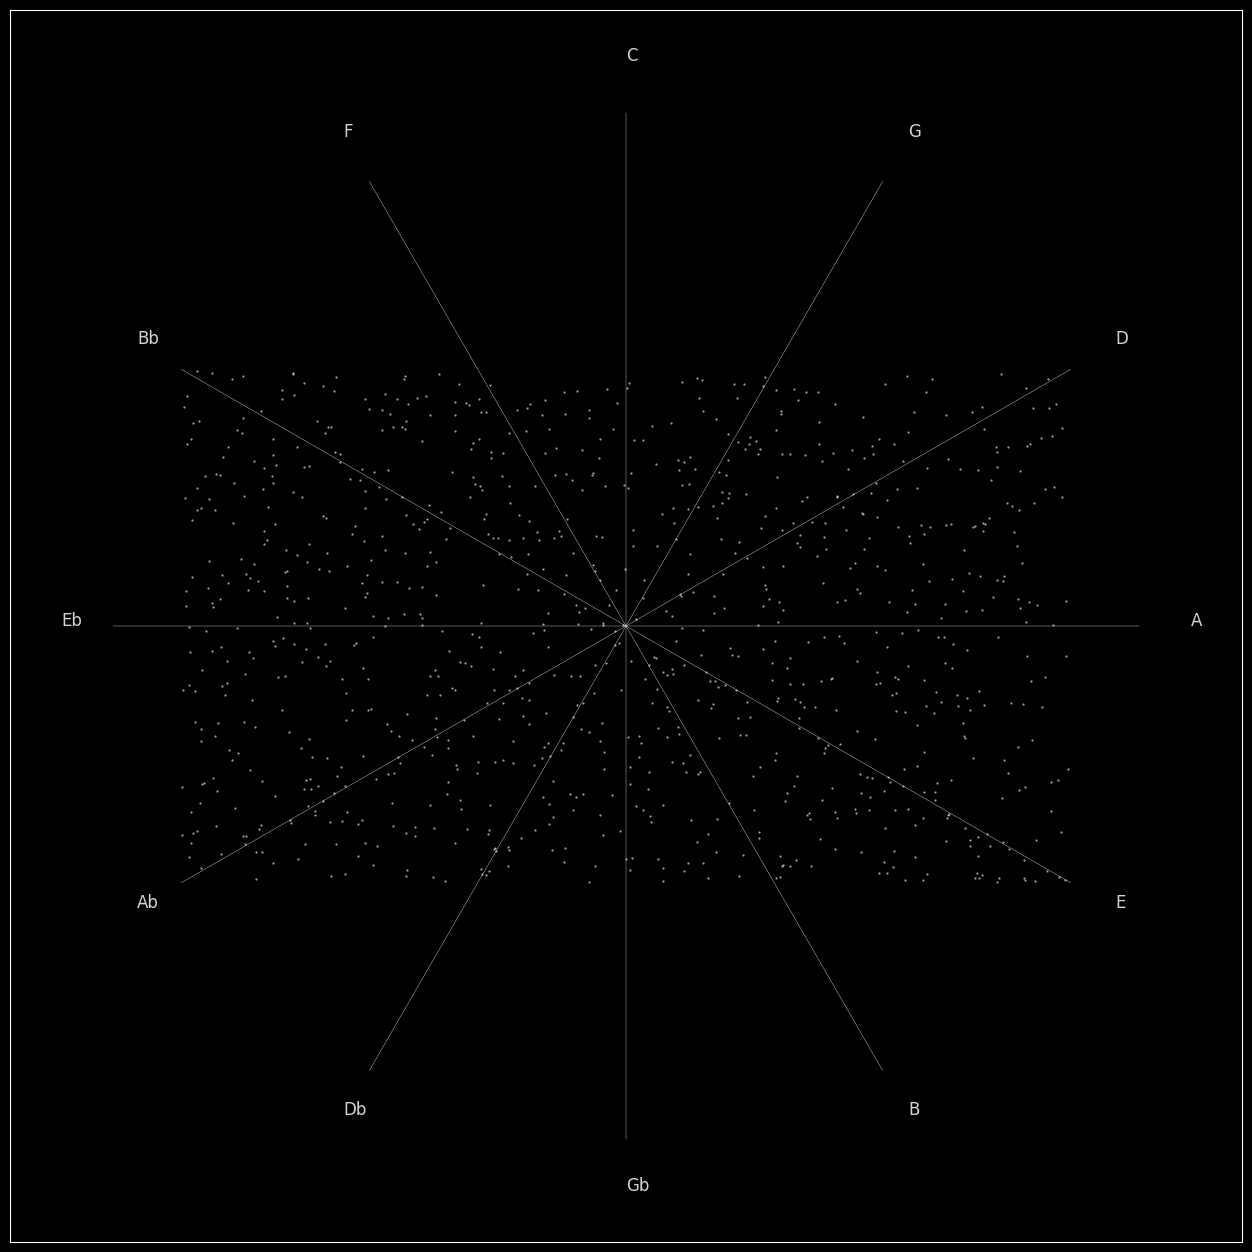

In [ ]:
cuadrilateral=np.array(['Ab', 'E', 'D','Bb'])
plot_fifths(M=12,
                label_map=fifths,
                omega_s=omega_s,
                r_min=0,
                r_max=1,
                phi_min=-np.pi,
                phi_max=np.pi,
                resolution=1000,
                N_iter=1000,
                input_map=cuadrilateral,
                output_path='salida.png',
                line_flag=True)